In [1]:
#%config InlineBackend.figure_formats = ['svg']

In [2]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
sns.set_style('white')
#plt.rcParams["figure.dpi"] = 600
from sklearn.model_selection import train_test_split


In [3]:
%load_ext autoreload
%autoreload 2


In [4]:
import sys
sys.path.append('..')
import multimodel_venn
from model_equations_separate_NC_store_numba import *

In [5]:
from matplotlib.colors import  ListedColormap
import matplotlib.ticker as mtick

In [6]:
gorder = [ 'Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral',   'Other']
gpalette = sns.color_palette('Set2', n_colors=4).as_hex() + ['black', 'lightgrey']
gpalette = ['#882255', '#CC6677', '#332288', 
             '#44AA99','#88CCEE',
            '#D0CFCA',  ]

sns.color_palette(gpalette)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.8156862745098039, 0.8117647058823529, 0.792156862745098)]

In [7]:
morder = ['EXOENZYME','OVERFLOW',   'ROS','MIXOTROPH', ]
media_order = ['lowN', 'pro99']
mpalette = [ '#426b69', '#9b7874', '#b191ff', '#84dcc6', ]
#mpalette = sns.color_palette(mpalette)
#morder = [morder[1]] + morder[3:]
#mpalette = [mpalette[1]] + mpalette[3:]
sns.color_palette(mpalette)

[(0.25882352941176473, 0.4196078431372549, 0.4117647058823529),
 (0.6078431372549019, 0.47058823529411764, 0.4549019607843137),
 (0.6941176470588235, 0.5686274509803921, 1.0),
 (0.5176470588235295, 0.8627450980392157, 0.7764705882352941)]

In [8]:
vorder1 = ['Versatile VPRO', 'Positive VPRO', 'Negative VPRO',  ]
vorder1 = ['Versatile VPRO','Non-Versatile VPRO',  ]

vpalette1 = [gpalette[1], gpalette[0], gpalette[3], gpalette[4], ]
vpalette1 = ['#5e392f', gpalette[1], gpalette[3],  ]
vpalette1 = [
    '#5E392F', 
    #'#DC267F',
    #'#FE6100',
    '#648FFF',
    #'#785EF0',
]
print (vorder1)
sns.color_palette(vpalette1)

['Versatile VPRO', 'Non-Versatile VPRO']


[(0.3686274509803922, 0.2235294117647059, 0.1843137254901961),
 (0.39215686274509803, 0.5607843137254902, 1.0)]

In [9]:
morder

['EXOENZYME', 'OVERFLOW', 'ROS', 'MIXOTROPH']

In [10]:
mmap = {
    'EXOENZYME' : 'E', 
    'EXOENZYME-MIXOTROPH' : 'EM' , 
    'EXOENZYME-ROS' : 'ER',
       'EXOENZYME-ROS-MIXOTROPH' : 'ERM', 
    'MIN' : '-', 
    'MIXOTROPH' : 'M',
    'OVERFLOW' : 'O',
       'OVERFLOW-EXOENZYME' : 'EO',
    'OVERFLOW-EXOENZYME-MIXOTROPH' : 'EOM',
       'OVERFLOW-MIXOTROPH' : 'OM',
    'OVERFLOW-ROS' : 'OR', 
    'OVERFLOW-ROS-EXOENZYME' : 'EOR',
       'OVERFLOW-ROS-MIXOTROPH' : 'ORM', 
    'ROS' : 'R', 
    'ROS-MIXOTROPH' : 'RM',
       'ROS-MIXOTROPH-OVERFLOW-EXOENZYME' : 'EORM',
}

In [11]:
import os
import glob
dpath = '../results/final/het/'
#glob.glob(os.path.join(dpath, 'versatile_vpros_*'))

In [12]:
vpro_df = pd.read_csv('../ML_model/versatile_vpros.csv')


In [13]:
def _get_param_size(model):
    pparams_to_update, pbounds, plog_params = get_param_tuning_values(model, 'PRO')
    return len(pparams_to_update)

num_params_map = {model: _get_param_size(model) for model in vpro_df.model.unique()}
vpro_df['num_params'] = vpro_df.model.map(num_params_map)
vpro_df

,model,Phase,VPRO,Inhibited,Neutral,Other,Strong,Sustained,Weak,pos_interaction,...,Versatile_STR,MODEL,EXOENZYME,OVERFLOW,ROS,MIXOTROPH,MIN,% positive,Versatile_STR_,num_params
0,EXOENZYME,add,vpro_11_62_EXOENZYME_C1_15,0,0,0.0,0.0,0.0,24,0,...,Non-Versatile VPRO,E,True,False,False,False,False,0.000000,Non-Versatile VPRO,6
1,EXOENZYME,add,vpro_11_62_EXOENZYME_C1_20,0,1,2.0,0.0,9.0,77,9,...,Versatile VPRO,E,True,False,False,False,False,0.101124,Versatile VPRO,6
2,EXOENZYME,add,vpro_11_62_EXOENZYME_C1_22,0,0,0.0,0.0,0.0,27,0,...,Non-Versatile VPRO,E,True,False,False,False,False,0.000000,Non-Versatile VPRO,6
3,EXOENZYME,add,vpro_11_62_EXOENZYME_C1_32,0,3,0.0,0.0,0.0,23,0,...,Non-Versatile VPRO,E,True,False,False,False,False,0.000000,Non-Versatile VPRO,6
4,EXOENZYME,add,vpro_11_62_EXOENZYME_C1_37,0,29,0.0,0.0,0.0,35,0,...,Non-Versatile VPRO,E,True,False,False,False,False,0.000000,Non-Versatile VPRO,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19771,ROS-MIXOTROPH-OVERFLOW-EXOENZYME,init,vpro_82_9_ROS-MIXOTROPH-OVERFLOW-EXOENZYME,0,0,0.0,0.0,0.0,209,0,...,Non-Versatile VPRO,EORM,True,True,True,True,False,0.000000,Non-Versatile VPRO,14
19772,ROS-MIXOTROPH-OVERFLOW-EXOENZYME,init,vpro_86_79_ROS-MIXOTROPH-OVERFLOW-EXOENZYME,0,19,4.0,0.0,0.0,237,0,...,Non-Versatile VPRO,EORM,True,True,True,True,False,0.000000,Non-Versatile VPRO,14
19773,ROS-MIXOTROPH-OVERFLOW-EXOENZYME,init,vpro_95_6_ROS-MIXOTROPH-OVERFLOW-EXOENZYME,0,16,56.0,236.0,1.0,0,237,...,Non-Versatile VPRO,EORM,True,True,True,True,False,0.766990,Non-Versatile VPRO,14
19774,ROS-MIXOTROPH-OVERFLOW-EXOENZYME,init,vpro_97_54_ROS-MIXOTROPH-OVERFLOW-EXOENZYME,0,127,123.0,0.0,17.0,15,17,...,Versatile VPRO,EORM,True,True,True,True,False,0.060284,Versatile VPRO,14


In [14]:
vpro_df

,model,Phase,VPRO,Inhibited,Neutral,Other,Strong,Sustained,Weak,pos_interaction,...,Versatile_STR,MODEL,EXOENZYME,OVERFLOW,ROS,MIXOTROPH,MIN,% positive,Versatile_STR_,num_params
0,EXOENZYME,add,vpro_11_62_EXOENZYME_C1_15,0,0,0.0,0.0,0.0,24,0,...,Non-Versatile VPRO,E,True,False,False,False,False,0.000000,Non-Versatile VPRO,6
1,EXOENZYME,add,vpro_11_62_EXOENZYME_C1_20,0,1,2.0,0.0,9.0,77,9,...,Versatile VPRO,E,True,False,False,False,False,0.101124,Versatile VPRO,6
2,EXOENZYME,add,vpro_11_62_EXOENZYME_C1_22,0,0,0.0,0.0,0.0,27,0,...,Non-Versatile VPRO,E,True,False,False,False,False,0.000000,Non-Versatile VPRO,6
3,EXOENZYME,add,vpro_11_62_EXOENZYME_C1_32,0,3,0.0,0.0,0.0,23,0,...,Non-Versatile VPRO,E,True,False,False,False,False,0.000000,Non-Versatile VPRO,6
4,EXOENZYME,add,vpro_11_62_EXOENZYME_C1_37,0,29,0.0,0.0,0.0,35,0,...,Non-Versatile VPRO,E,True,False,False,False,False,0.000000,Non-Versatile VPRO,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19771,ROS-MIXOTROPH-OVERFLOW-EXOENZYME,init,vpro_82_9_ROS-MIXOTROPH-OVERFLOW-EXOENZYME,0,0,0.0,0.0,0.0,209,0,...,Non-Versatile VPRO,EORM,True,True,True,True,False,0.000000,Non-Versatile VPRO,14
19772,ROS-MIXOTROPH-OVERFLOW-EXOENZYME,init,vpro_86_79_ROS-MIXOTROPH-OVERFLOW-EXOENZYME,0,19,4.0,0.0,0.0,237,0,...,Non-Versatile VPRO,EORM,True,True,True,True,False,0.000000,Non-Versatile VPRO,14
19773,ROS-MIXOTROPH-OVERFLOW-EXOENZYME,init,vpro_95_6_ROS-MIXOTROPH-OVERFLOW-EXOENZYME,0,16,56.0,236.0,1.0,0,237,...,Non-Versatile VPRO,EORM,True,True,True,True,False,0.766990,Non-Versatile VPRO,14
19774,ROS-MIXOTROPH-OVERFLOW-EXOENZYME,init,vpro_97_54_ROS-MIXOTROPH-OVERFLOW-EXOENZYME,0,127,123.0,0.0,17.0,15,17,...,Versatile VPRO,EORM,True,True,True,True,False,0.060284,Versatile VPRO,14


In [15]:
vorder = ['Versatile VPRO','Non-Versatile VPRO',  ]
vpalette = [ '#FF8E8F', '#9c110b']
vpalette = [ 'black', '#9c110b']

sns.color_palette(vpalette)

[(0.0, 0.0, 0.0),
 (0.611764705882353, 0.06666666666666667, 0.043137254901960784)]

In [16]:
count_df = vpro_df.loc[vpro_df.Phase.isin(['init', 'extend'])].groupby(['model', 'MODEL',] + morder)[gorder].sum().reset_index()

count_df

,model,MODEL,EXOENZYME,OVERFLOW,ROS,MIXOTROPH,Strong,Sustained,Inhibited,Weak,Neutral,Other
0,EXOENZYME,E,True,False,False,False,622.0,8700.0,10,10217,24513,6828.0
1,EXOENZYME-MIXOTROPH,EM,True,False,False,True,82.0,3924.0,379,12798,32532,5247.0
2,EXOENZYME-ROS,ER,True,False,True,False,1776.0,12265.0,14,15275,24386,10494.0
3,EXOENZYME-ROS-MIXOTROPH,ERM,True,False,True,True,3654.0,13799.0,33,26977,29094,14015.0
4,MIN,-,False,False,False,False,0.0,0.0,16,16142,6651,0.0
5,MIXOTROPH,M,False,False,False,True,0.0,12.0,56,21119,15344,179.0
6,OVERFLOW,O,False,True,False,False,99.0,1303.0,23,29791,27817,2175.0
7,OVERFLOW-EXOENZYME,EO,True,True,False,False,882.0,18743.0,11,19872,54900,11675.0
8,OVERFLOW-EXOENZYME-MIXOTROPH,EOM,True,True,False,True,1629.0,21806.0,786,20621,61691,14339.0
9,OVERFLOW-MIXOTROPH,OM,False,True,False,True,47.0,2509.0,240,36987,56449,3214.0


In [17]:
def _get_param_size(model):
    pparams_to_update, pbounds, plog_params = get_param_tuning_values(model, 'PRO')
    return len(pparams_to_update)

count_df['num_params'] = count_df.model.map(_get_param_size)
count_df

,model,MODEL,EXOENZYME,OVERFLOW,ROS,MIXOTROPH,Strong,Sustained,Inhibited,Weak,Neutral,Other,num_params
0,EXOENZYME,E,True,False,False,False,622.0,8700.0,10,10217,24513,6828.0,6
1,EXOENZYME-MIXOTROPH,EM,True,False,False,True,82.0,3924.0,379,12798,32532,5247.0,10
2,EXOENZYME-ROS,ER,True,False,True,False,1776.0,12265.0,14,15275,24386,10494.0,9
3,EXOENZYME-ROS-MIXOTROPH,ERM,True,False,True,True,3654.0,13799.0,33,26977,29094,14015.0,13
4,MIN,-,False,False,False,False,0.0,0.0,16,16142,6651,0.0,6
5,MIXOTROPH,M,False,False,False,True,0.0,12.0,56,21119,15344,179.0,10
6,OVERFLOW,O,False,True,False,False,99.0,1303.0,23,29791,27817,2175.0,7
7,OVERFLOW-EXOENZYME,EO,True,True,False,False,882.0,18743.0,11,19872,54900,11675.0,7
8,OVERFLOW-EXOENZYME-MIXOTROPH,EOM,True,True,False,True,1629.0,21806.0,786,20621,61691,14339.0,11
9,OVERFLOW-MIXOTROPH,OM,False,True,False,True,47.0,2509.0,240,36987,56449,3214.0,11


In [18]:
count_ver_df = vpro_df.loc[vpro_df.Phase.isin(['init', 'extend']) & vpro_df.Versatile].groupby(['model', 'MODEL',] + morder)[gorder].sum().reset_index()
count_ver_df



,model,MODEL,EXOENZYME,OVERFLOW,ROS,MIXOTROPH,Strong,Sustained,Inhibited,Weak,Neutral,Other
0,EXOENZYME,E,True,False,False,False,37.0,5675.0,4,3131,5080,2886.0
1,EXOENZYME-MIXOTROPH,EM,True,False,False,True,3.0,2672.0,286,1620,4975,2263.0
2,EXOENZYME-ROS,ER,True,False,True,False,252.0,10188.0,7,4859,6417,4757.0
3,EXOENZYME-ROS-MIXOTROPH,ERM,True,False,True,True,269.0,13140.0,4,7174,7837,7901.0
4,MIXOTROPH,M,False,False,False,True,0.0,12.0,0,56,162,84.0
5,OVERFLOW,O,False,True,False,False,78.0,1263.0,2,10620,10246,1389.0
6,OVERFLOW-EXOENZYME,EO,True,True,False,False,25.0,13098.0,2,5088,11199,4865.0
7,OVERFLOW-EXOENZYME-MIXOTROPH,EOM,True,True,False,True,5.0,12317.0,259,5035,9789,4462.0
8,OVERFLOW-MIXOTROPH,OM,False,True,False,True,30.0,2361.0,102,10526,14212,1958.0
9,OVERFLOW-ROS,OR,False,True,True,False,711.0,1775.0,8,13444,7964,5019.0


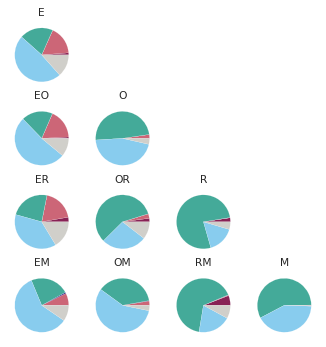

In [19]:
sns.set_context('paper')
fig, axes = plt.subplots(4,4, figsize=(5,5))# , sharex=True)# , sharey=True)
for i1,m1 in enumerate(morder):
    for i2,m2 in enumerate(morder):
        if i1 >= i2:
            othercols = [m for m in morder if m not in [m1, m2]]
            tmpdf =count_df.loc[count_df[m1] & count_df[m2] & ~count_df[othercols].any(axis=1) ]
            tmpdf.index = tmpdf.MODEL
            t=tmpdf[gorder].T.squeeze()
            #_wedges, labels, percentages = 
            axes[i1,i2].pie(t, colors=gpalette, #title=tmpdf.MODEL.unique()[0],
               wedgeprops={'linewidth': 0.1, 'edgecolor': 'white'},
                                                           #labels=t.index, autopct='%1.1f%%', 
                  )
            axes[i1,i2].set(title=tmpdf.MODEL.unique()[0])
        else: 
            axes[i1,i2].axis('off')
            
        #tmpdf.plot(kind='bar', stacked=True, color=gpalette, ax=axes[i1,i2], legend=False,)


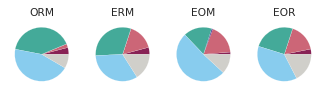

In [20]:
sns.set_context('paper')
fig, axes = plt.subplots(1,4, figsize=(5,5))# , sharex=True)# , sharey=True)
for i1,m1 in enumerate(morder):
    #for i2,m2 in enumerate(morder[:-1]):
        othercols = [m for m in morder if m not in [m1]]
        tmpdf =count_df.loc[~count_df[m1] & count_df[othercols].all(axis=1) ]
        tmpdf.index = tmpdf.MODEL
        #print(tmpdf)
        t=tmpdf[gorder].T.squeeze()
    
        #_wedges, labels, percentages = 
        axes[i1].pie(t, colors=gpalette, #title=tmpdf.MODEL.unique()[0],
           wedgeprops={'linewidth': 0.1, 'edgecolor': 'white'},
                                                       #labels=t.index, autopct='%1.1f%%', 
              )
        axes[i1].set(title=tmpdf.MODEL.unique()[0])
        #tmpdf.plot(kind='bar', stacked=True, color=gpalette, ax=axes[i1,i2], legend=False,)


[Text(0.5, 1.0, '-')]

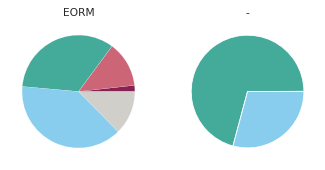

In [21]:
sns.set_context('paper')
fig, axes = plt.subplots(1,2, figsize=(5,5))# , sharex=True)# , sharey=True)
tmpdf =count_df.loc[count_df[morder].all(axis=1) ]
tmpdf.index = tmpdf.MODEL
#print(tmpdf)
t=tmpdf[gorder].T.squeeze()

#_wedges, labels, percentages = 
axes[0].pie(t, colors=gpalette, #title=tmpdf.MODEL.unique()[0],
           wedgeprops={'linewidth': 0.1, 'edgecolor': 'white'},
                                               #labels=t.index, autopct='%1.1f%%', 
      )
axes[0].set(title=tmpdf.MODEL.unique()[0])
#tmpdf.plot(kind='bar', stacked=True, color=gpalette, ax=axes[i1,i2], legend=False,)


tmpdf =count_df.loc[~count_df[morder].any(axis=1) ]
tmpdf.index = tmpdf.MODEL
#print(tmpdf)
t=tmpdf[gorder].T.squeeze()

#_wedges, labels, percentages = 
axes[1].pie(t, colors=gpalette, #title=tmpdf.MODEL.unique()[0],
   #wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
                                               #labels=t.index, autopct='%1.1f%%', 
      )
axes[1].set(title=tmpdf.MODEL.unique()[0])
#tmpdf.plot(kind='bar', stacked=True, color=gpalette, ax=axes[i1,i2], legend=False,)


In [22]:
sns.set_context('paper')

In [23]:
vcount_df = vpro_df.loc[
        vpro_df.Phase.isin(['init', 'extend'])
    ].pivot_table(
        index='MODEL', columns='Versatile_STR',
        values='VPRO', aggfunc='count',fill_value=0 )

In [24]:
vcount_df = vcount_df.reindex(columns=vorder1)
vcount_df = vcount_df.sort_values(by=vorder1,ascending=False)

In [25]:
vcount_df

Versatile_STR,Versatile VPRO,Non-Versatile VPRO
MODEL,,
ERM,390,1087
OM,379,1283
EORM,347,920
OR,325,745
O,300,670
ORM,297,1073
EOR,292,734
EOM,284,1156
EO,279,857


In [26]:
vpro_df.columns

Index(['model', 'Phase', 'VPRO', 'Inhibited', 'Neutral', 'Other', 'Strong',
       'Sustained', 'Weak', 'pos_interaction', 'neg_interaction', 'Versatile',
       'simulations_per_VPRO', 'Versatile_STR', 'MODEL', 'EXOENZYME',
       'OVERFLOW', 'ROS', 'MIXOTROPH', 'MIN', '% positive', 'Versatile_STR_',
       'num_params'],
      dtype='object')

In [27]:
count_df

,model,MODEL,EXOENZYME,OVERFLOW,ROS,MIXOTROPH,Strong,Sustained,Inhibited,Weak,Neutral,Other,num_params
0,EXOENZYME,E,True,False,False,False,622.0,8700.0,10,10217,24513,6828.0,6
1,EXOENZYME-MIXOTROPH,EM,True,False,False,True,82.0,3924.0,379,12798,32532,5247.0,10
2,EXOENZYME-ROS,ER,True,False,True,False,1776.0,12265.0,14,15275,24386,10494.0,9
3,EXOENZYME-ROS-MIXOTROPH,ERM,True,False,True,True,3654.0,13799.0,33,26977,29094,14015.0,13
4,MIN,-,False,False,False,False,0.0,0.0,16,16142,6651,0.0,6
5,MIXOTROPH,M,False,False,False,True,0.0,12.0,56,21119,15344,179.0,10
6,OVERFLOW,O,False,True,False,False,99.0,1303.0,23,29791,27817,2175.0,7
7,OVERFLOW-EXOENZYME,EO,True,True,False,False,882.0,18743.0,11,19872,54900,11675.0,7
8,OVERFLOW-EXOENZYME-MIXOTROPH,EOM,True,True,False,True,1629.0,21806.0,786,20621,61691,14339.0,11
9,OVERFLOW-MIXOTROPH,OM,False,True,False,True,47.0,2509.0,240,36987,56449,3214.0,11


In [28]:
#percent_count_df[gorder] = percent_count_df[gorder].div(percent_count_df[gorder].sum(axis=0))

In [39]:
sns.set_context('poster')

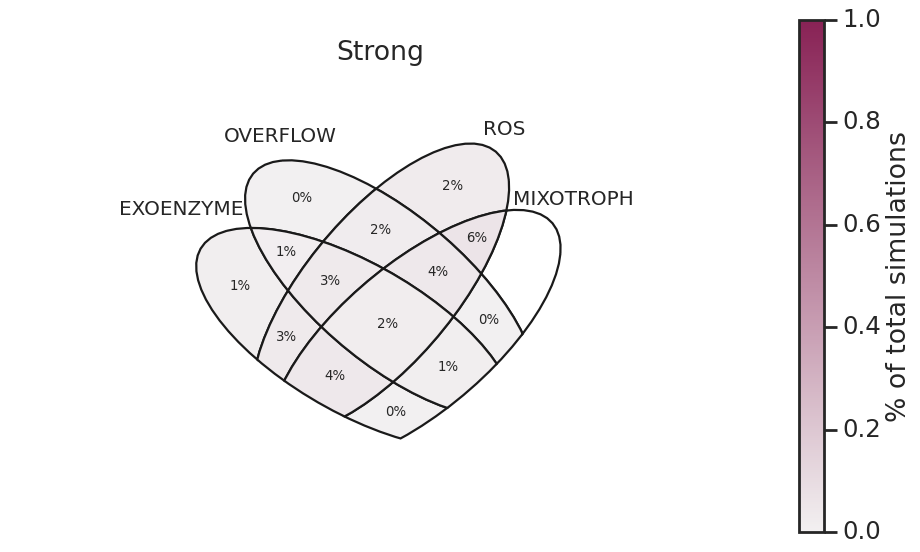

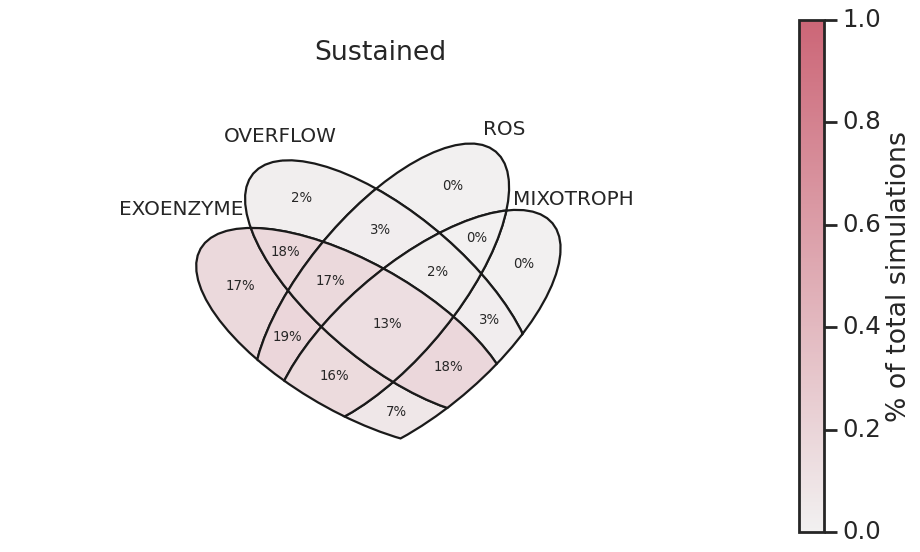

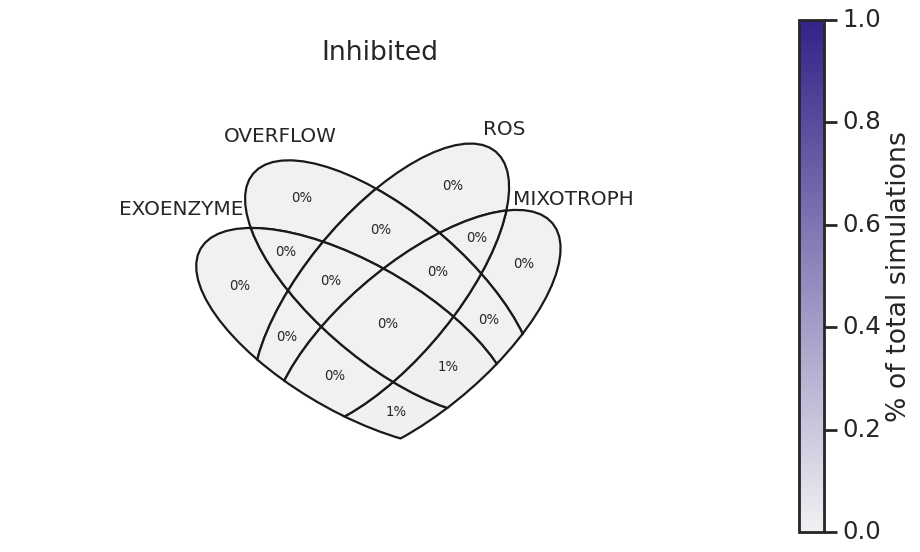

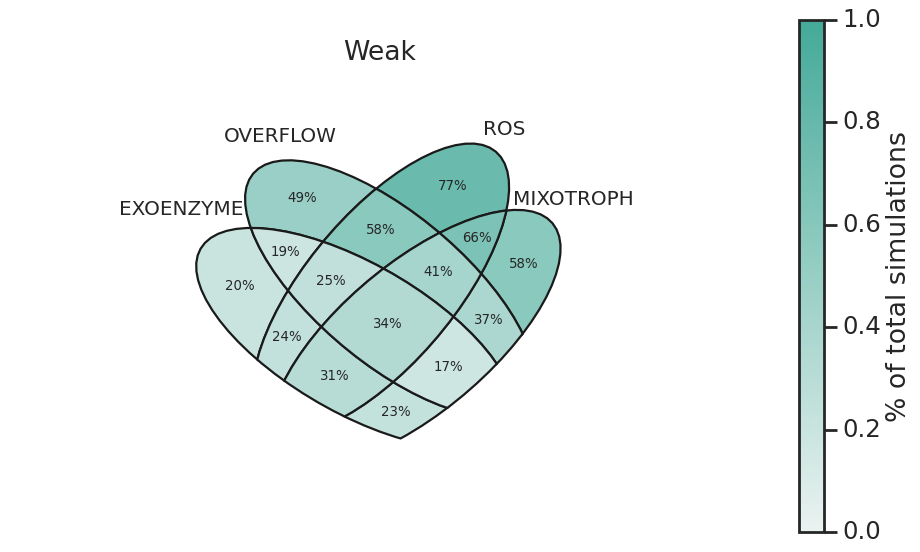

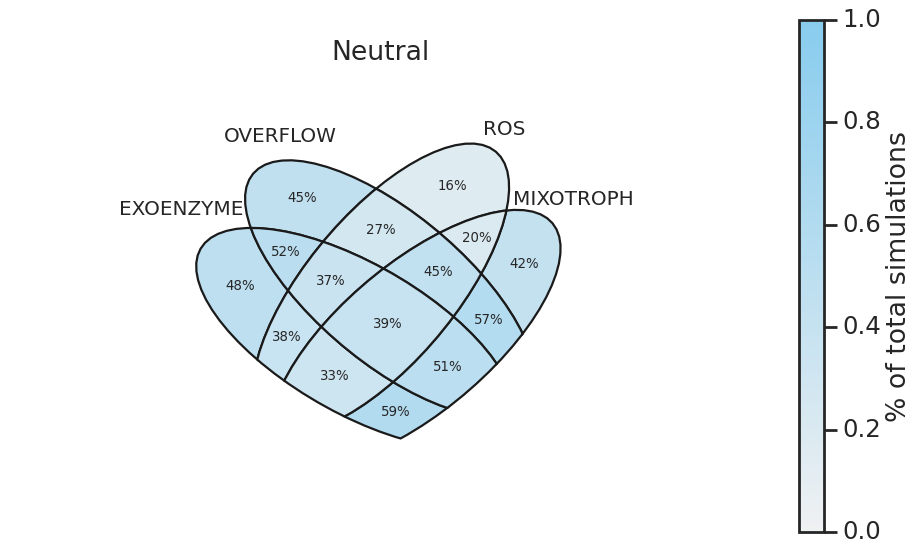

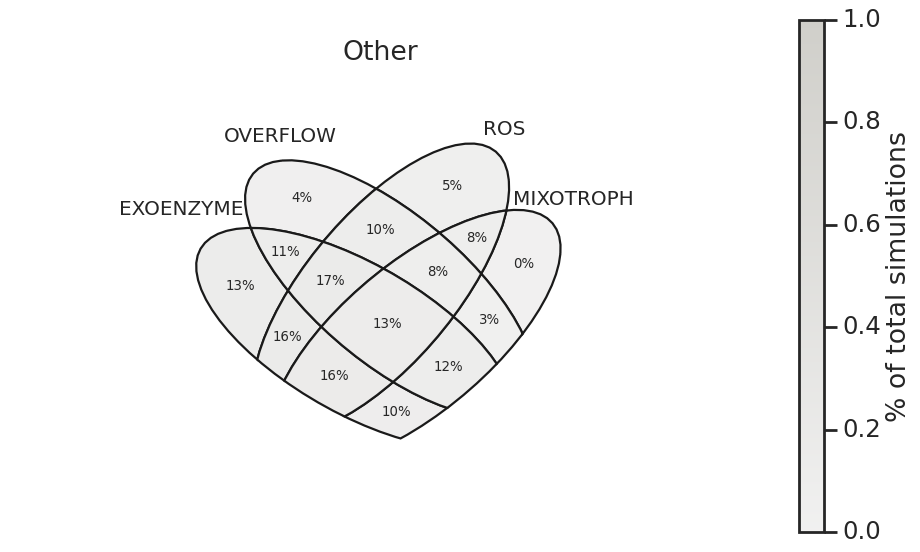

In [41]:
percent_count_df = count_df.copy()
percent_count_df['total'] = percent_count_df[gorder].sum(axis=1)
for i in gorder:
    percent_count_df[i] = percent_count_df[i].div(percent_count_df['total'])
for i,c  in zip(gorder, gpalette):
    data_dict = percent_count_df.loc[~percent_count_df[i].isin([0])].groupby(morder)[i].first()
    multimodel_venn.multimodel_venn(
        morder, cmap=sns.light_palette(c, n_colors=16, as_cmap=True), 
        data_dict=data_dict, vmin=0, vmax=1, 
        cbar_label=f'% of total simulations',
        annfmt='.0%'
    )
    plt.title(i)
    plt.show()

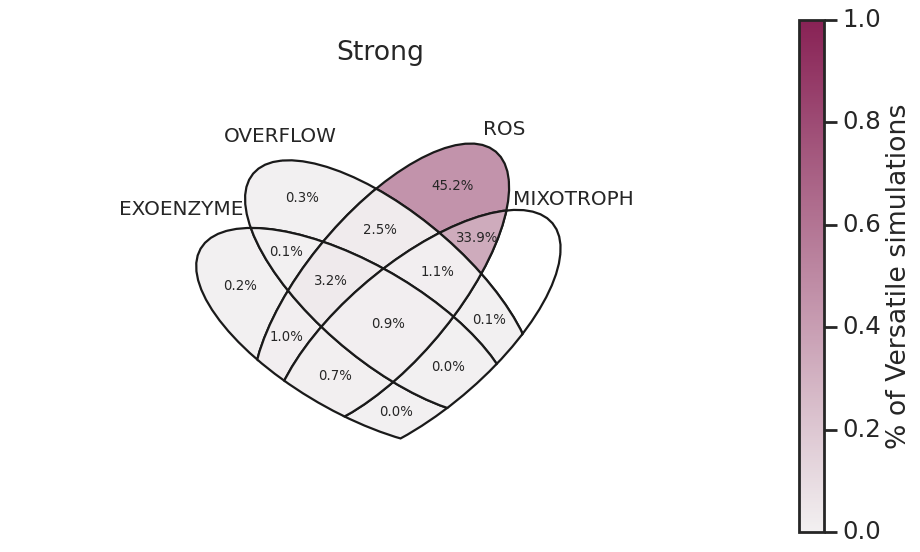

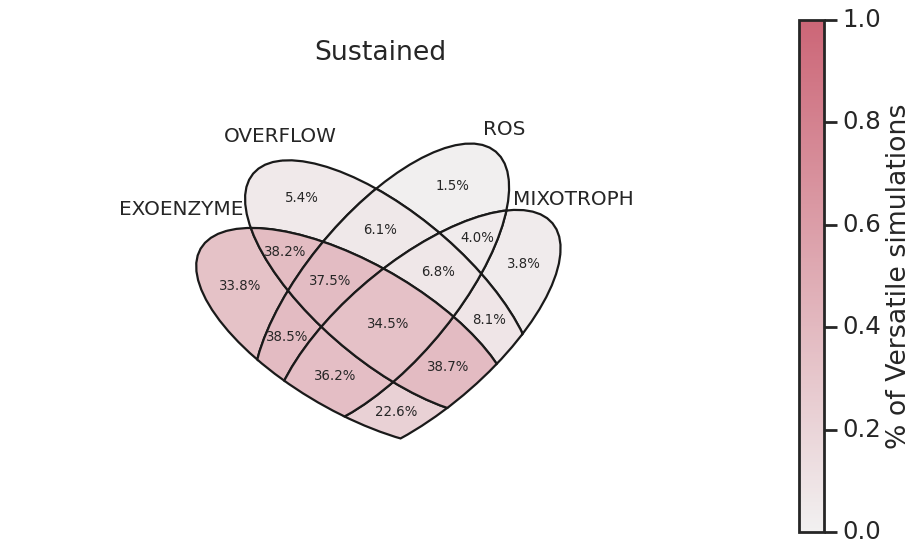

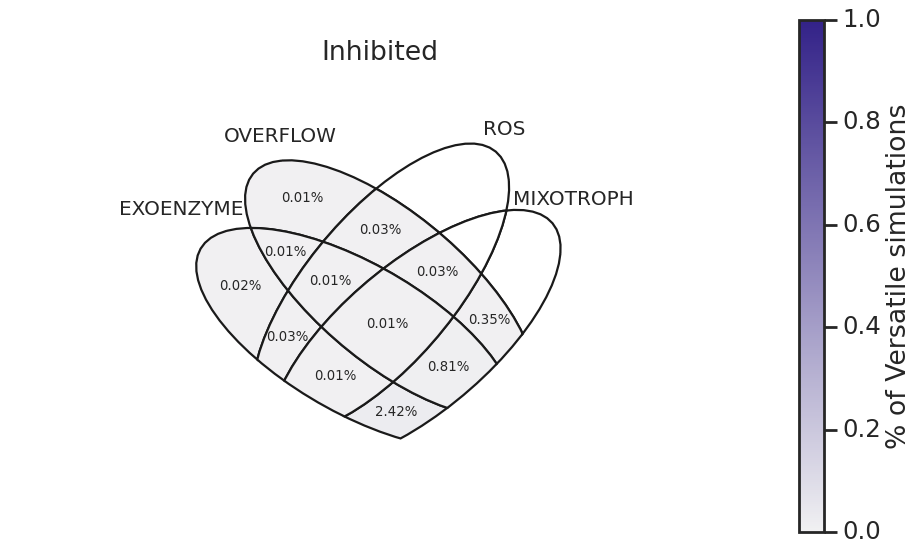

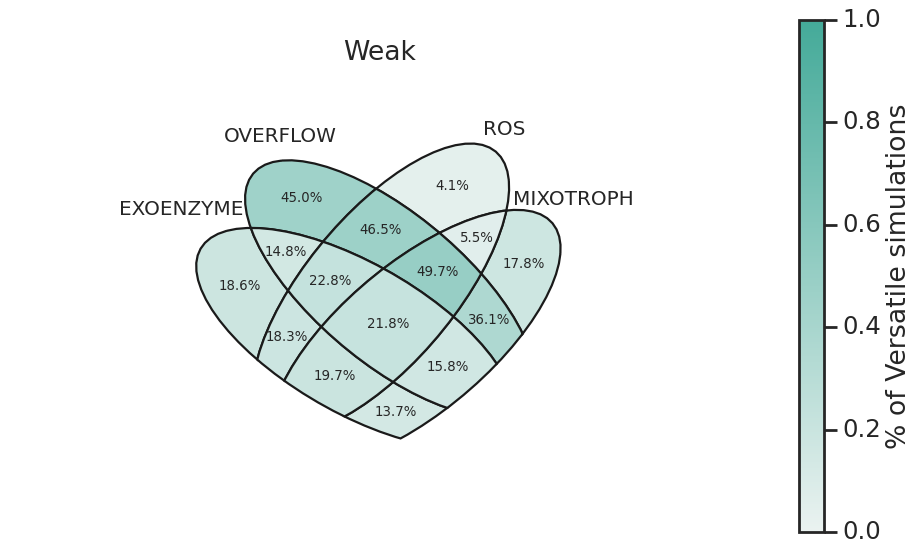

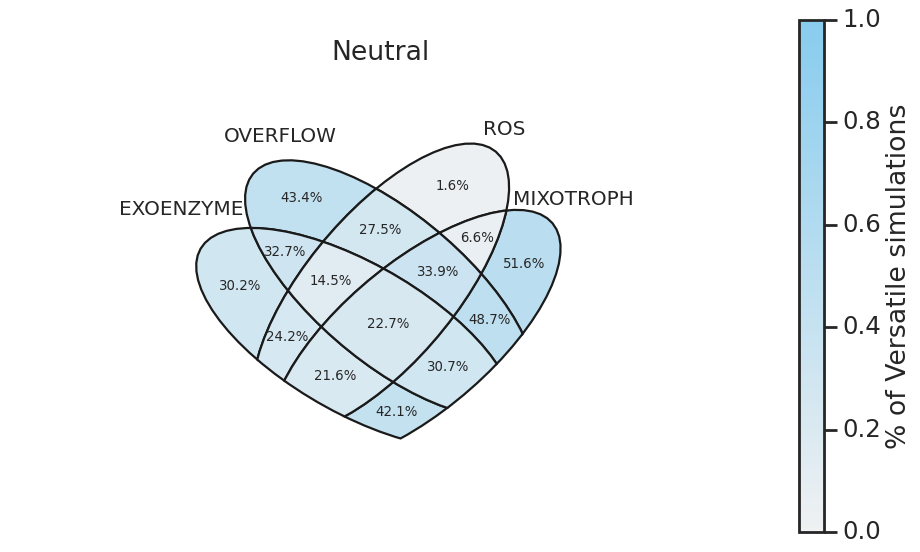

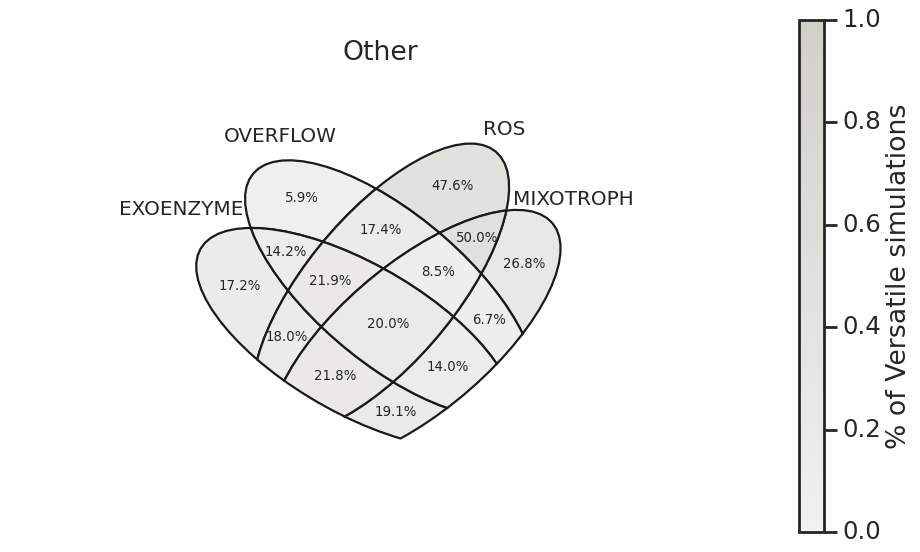

In [44]:
percent_count_df = count_ver_df.copy()
percent_count_df['total'] = percent_count_df[gorder].sum(axis=1)
for i in gorder:
    percent_count_df[i] = percent_count_df[i].div(percent_count_df['total'])
for i,c  in zip(gorder, gpalette):
    data_dict = percent_count_df.loc[~percent_count_df[i].isin([0])].groupby(morder)[i].first()
    annfmt='.1%'
    if i == 'Inhibited':
        annfmt='.2%'
    multimodel_venn.multimodel_venn(
        morder, cmap=sns.light_palette(c, n_colors=16, as_cmap=True), 
        data_dict=data_dict, vmin=0, vmax=1, 
        cbar_label=f'% of Versatile simulations',
        annfmt=annfmt
    )
    plt.title(i)
    plt.show()

In [32]:
data_dict

EXOENZYME  OVERFLOW  ROS    MIXOTROPH
False      False     False  True         0.267516
                     True   False        0.476071
                            True         0.500000
           True      False  False        0.058861
                            True         0.067080
                     True   False        0.173542
                            True         0.084977
True       False     False  False        0.171653
                            True         0.191471
                     True   False        0.179645
                            True         0.217509
           True      False  False        0.141932
                            True         0.140019
                     True   False        0.218938
                            True         0.199946
Name: Other, dtype: float64

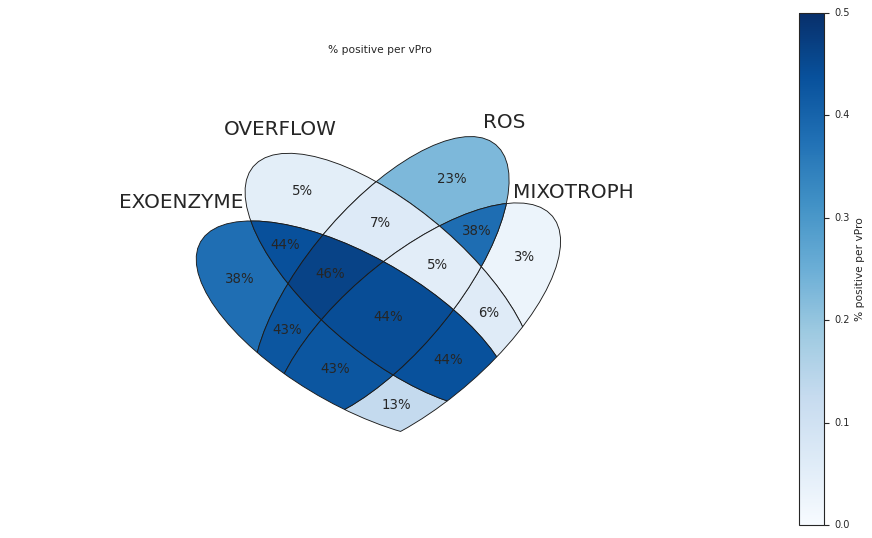

In [33]:
data_dict = vpro_df.loc[vpro_df.Versatile].groupby(morder)['% positive'].median() 
multimodel_venn.multimodel_venn(
    morder, cmap=sns.color_palette('Blues', n_colors=16, as_cmap=True), 
    data_dict=data_dict, vmin=0, vmax=0.5, 
    cbar_label='% positive per vPro',
    annfmt='.0%'
)

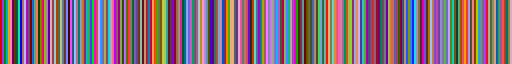

In [35]:
import colorcet
colorcet.cm_n['glasbey_dark']

In [36]:
colors = colorcet.palette_n['glasbey_dark'][:16]
colors

['#d60000',
 '#8c3bff',
 '#018700',
 '#00acc6',
 '#e6a500',
 '#ff7ed1',
 '#6b004f',
 '#573b00',
 '#005659',
 '#15e18c',
 '#0000dd',
 '#a17569',
 '#bcb6ff',
 '#bf03b8',
 '#645472',
 '#790000']

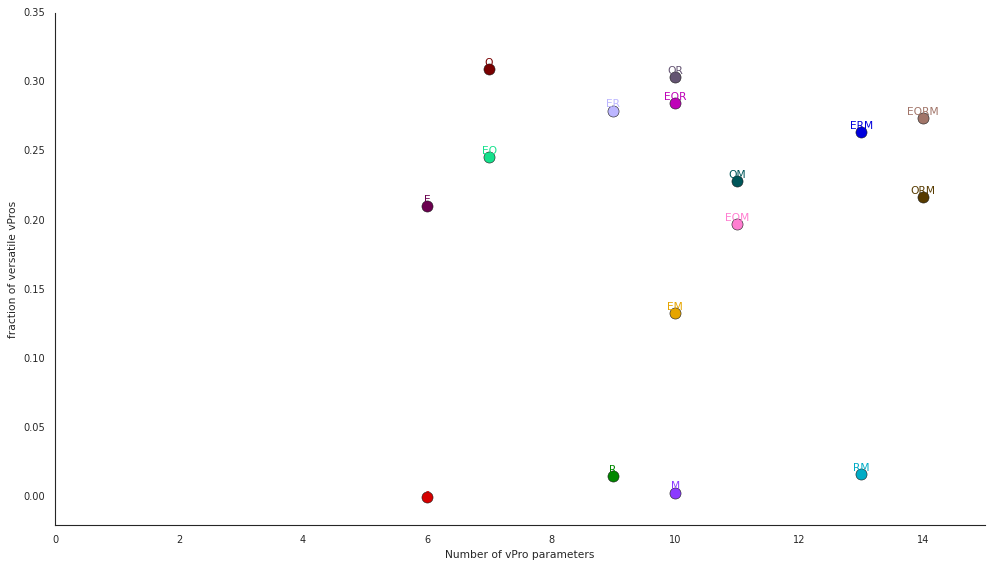

In [37]:
import matplotlib
tdf =  vpro_df.loc[vpro_df.Phase.isin(['init', 'extend'])].groupby(['MODEL', 'num_params']).Versatile.mean().reset_index().sort_values('Versatile')
tdf


x_col = 'num_params'
y_col = 'Versatile'
hue_col = 'MODEL'
label_col = 'MODEL'

fig, ax = plt.subplots()
colors = colorcet.palette_n['glasbey_dark'][:16]
for (_,x),c in zip(tdf.iterrows(),colors):
#for x in tdf.iterrows():
    
    #print(x,c)
    ax.plot(x[x_col], x[y_col], 'o', color=c, ms=10, label=x[label_col])
    ax.annotate(x[label_col], xy=(x[x_col],x[y_col]+0.001), color=c, ha='center', va='bottom')
ax.set_xlabel('Number of vPro parameters')
ax.set_ylabel('fraction of versatile vPros')
ax.set(xlim=(0,15), ylim=(-0.02, 0.35))
sns.despine()
#ax.xlim(0,15)
#ax.legend(title=hue_col)

In [38]:
sns.set_context('poster')

In [ ]:
vcount_df.plot(
    kind='bar', stacked=True, color=vpalette1, width=1, figsize=(7,7), rot=0, lw=0.01, ylabel='number of VPROs', title='VPROs per model'
)

In [ ]:
fig, axes = plt.subplots(1,4, figsize=(15,4) , sharey=True)# , sharey=True)

for m, ax in zip(morder[:-1], axes):
    
    vcdf = vpro_df.loc[
        vpro_df.Phase.isin(['init', 'extend']) & vpro_df[m]
    ].pivot_table(
        index='MODEL', columns='Versatile_STR',
        values='VPRO', aggfunc='count',fill_value=0 )    
    vcdf = vcdf.reindex(columns=vorder1)
    vcdf = vcdf.div(vcdf.sum(axis=1), axis=0) * 100
    vcdf = vcdf.sort_values(by=vorder1,ascending=False)
    vcdf.plot(
        kind='bar', stacked=True, color=vpalette1, width=1, #figsize=(7,7), 
        #rot=0, 
        lw=0.01, ax=ax, legend=False, title=m, ylabel='% VPROs per model'
        
    )
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    

In [ ]:
vcount1_df = vpro_df.loc[
        vpro_df.Phase.isin(['init', 'extend']) &
        vpro_df.model.isin(morder[:-1])
    ].pivot_table(
        index='model', columns='Versatile_STR',
        values='VPRO', aggfunc='count',fill_value=0 )

In [ ]:
vpro_df.loc[
        vpro_df.Phase.isin(['init', 'extend']) &
        vpro_df.model.isin(morder[:-1])&
        vpro_df.Versatile_STR.isin(['Versatile VPRO'])
].groupby(['model', 'Versatile_STR']).size()

In [ ]:
vpro_df

In [ ]:
t= vpro_df.loc[
        vpro_df.Phase.isin(['init', 'extend']) &
        vpro_df.model.isin(morder[:-1])
        
].groupby(['model'])[['simulations_per_VPRO', 'pos_interaction', 'neg_interaction', 'Neutral', 'Weak']].sum()
t['% pos'] = t['pos_interaction'] / t['simulations_per_VPRO'] 
t['% neg'] = t['neg_interaction'] / t['simulations_per_VPRO'] 
t['% neutral'] = t['Neutral'] / t['simulations_per_VPRO'] 
t['% Weak'] = t['Weak'] / t['simulations_per_VPRO'] 
t['% Weak/neutral'] = (t['Weak'] + t['Neutral']) / t['simulations_per_VPRO'] 

t

In [ ]:
vcount1_df = vcount1_df.reindex(columns=vorder1, index=morder[:-1])
#vcoun1_df = vcount1_df.sort_values(by=vorder1)

In [ ]:
sns.set_context('poster')


In [ ]:
vcount1_df.columns.name = None
vcount1_df.columns

In [ ]:
print(vcount1_df.sum(axis=1))


In [ ]:
vcount1_df = vcount1_df.div(vcount1_df.sum(axis=1), axis=0) * 100


In [ ]:
vpro_df.columns

In [ ]:

#cdf = count_df.copy()
cdf = count_df[gorder].div(count_df[gorder].sum(axis=1), axis=0) * 100

cdf.index=count_df.MODEL
cdf['pos'] = cdf[['Strong','Sustained']].sum(axis=1)
cdf['neg'] = cdf[['Inhibited','Weak']].sum(axis=1)
cdf = cdf.sort_values(by=['pos', 'neg',], ascending=False)
cdf[gorder].plot(
    kind='bar', stacked=True, color=gpalette, width=1, figsize=(7,7), rot=0, lw=0.01, 
    ylabel='% of simulations', title='Breakdown of Simulations per Phenotype'
)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())


In [ ]:
count_df

In [ ]:
sns.set_context('paper')

In [ ]:
import matplotlib.ticker as mtick

cdf = count_df.loc[count_df['model'].isin(morder[:-1])].copy()
    
cdf.index=cdf.model
cdf = cdf.reindex(index=reversed(morder[:-1]))
print(cdf[gorder].sum(axis=1))
#cdf = cdf[gorder].div(cdf[gorder].sum(axis=1), axis=0) * 100
cdf[gorder].plot(
    kind='barh', stacked=True, color=gpalette, width=0.9, figsize=(2,2), 
    #rot=0, 
    lw=0.01, #legend=False,
    xlabel='% of simulations', title='Simulations per Phenotype', ylabel='',
)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())
sns.despine(bottom=True, left=True)

In [ ]:
cdf

In [ ]:
cdf = count_df.loc[count_df['model'].isin(morder[:-1])].copy()

In [ ]:
import matplotlib.ticker as mtick

cdf = count_ver_df.loc[count_ver_df['model'].isin(morder[:-1])].copy()
cdf.index=cdf.model
cdf = cdf.reindex(index=reversed(morder[:-1]))
cdf = cdf[gorder].div(cdf[gorder].sum(axis=1), axis=0) * 100
cdf[gorder].plot(
    kind='barh', stacked=True, color=gpalette, width=0.9, figsize=(2,2), 
    #rot=0, 
    lw=0.01, legend=False,
    xlabel='% of simulations', title='Simulations per Phenotype\n(Versatile VPROs)', ylabel='',
)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())
sns.despine(bottom=True, left=True)

In [ ]:
vcount1_df.index.name = 'model'
cdf = count_df.loc[count_df['model'].isin(morder[:-1])].copy()
cdf.index=cdf.model
cdf = cdf.reindex(index=reversed(morder[:-1]))
cdf = cdf[gorder].div(cdf[gorder].sum(axis=1), axis=0) * 100

cdfv = count_ver_df.loc[count_ver_df['model'].isin(morder[:-1])].copy()
cdfv.index=cdfv.model
cdfv = cdfv.reindex(index=reversed(morder[:-1]))
cdfv = cdfv[gorder].div(cdfv[gorder].sum(axis=1), axis=0) * 100

vcount1_df['analysis'] = 'VPROs per model'
cdfv['analysis'] = 'Simulations per Phenotype\n(Versatile VPROs)'
cdf['analysis'] = 'Simulations per Phenotype'

newcdf = pd.concat([cdfv, vcount1_df, cdf]).reset_index().fillna(0)

newcdf

In [ ]:
for m in morder[:-1]:
    t = newcdf.loc[newcdf.model.isin([m])]
    t.index = t.analysis
    t[gorder+vorder1].plot(
        kind='barh', stacked=True, color=gpalette+vpalette1, width=0.9,  rot=0, lw=0, xlabel='', title=m,ylabel='',
         figsize=(2,2), legend=False,
    )
    sns.despine(bottom=True, left=True)
    plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())
    plt.show()
    print(m)

In [ ]:
sns.set_context('paper')
vcount1_df.columns.name = None
vcount1_df.index.name = None
vcount1_df = vcount1_df.reindex(index=reversed(morder[:-1]))

vcount1_df.plot(
    kind='barh', stacked=True, color=vpalette1, width=0.9,  rot=0, lw=0, xlabel='% of VPROs', title='VPROs per model',
     figsize=(2,2), #legend=False,
)
sns.despine(bottom=True, left=True)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())


In [ ]:
cdf

In [ ]:
count_ver_df.loc[count_ver_df.model.isin(morder[:-1])].groupby('model')[gorder].sum().sum(axis=1)


In [ ]:
count_df

In [ ]:
count_ver_df

In [ ]:
cdf

In [ ]:
vcount_df

In [ ]:
vcount1_df

In [ ]:
fig, axes = plt.subplots(1,4, figsize=(15,4) , sharey=True)# , sharey=True)

for m, ax in zip(morder[:-1], axes):
    
    cdf = count_df.loc[count_df[m]].copy()
    
    cdf.index=cdf.MODEL
    cdf = cdf[gorder].div(cdf[gorder].sum(axis=1), axis=0) * 100
    cdf['pos'] = cdf[['Strong','Sustained']].sum(axis=1)
    cdf['neg'] = cdf[['Inhibited','Weak']].sum(axis=1)
    cdf = cdf.sort_values(by=['pos', 'neg',])
    #cdf = cdf/ cdf[gorder].sum(axis=1)
    cdf[gorder].plot(
        kind='bar', stacked=True, color=gpalette, width=1, #figsize=(7,7), 
        #rot=0, 
        lw=0.01, ax=ax, legend=False, title=m, ylabel='% of simulations'
        
    )
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    

In [ ]:
cdf